In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import MDAnalysis as mda
from tqdm import tqdm
from numpy import linalg as LA
from MDAnalysis.analysis import align
from matplotlib.ticker import FuncFormatter

%run ~/.mpl_set.py

In [2]:
import pyemma

In [3]:
energy_df = pd.read_pickle("./nonbonded_nsp10-16.pkl")
dist_df = pd.read_pickle("./dist_nsp10-16.pkl")
contact_df = pd.read_pickle('./n_contacts_nsp10-16.pkl')
df_all = pd.merge(dist_df, energy_df, on=['sys_name', 'frame'])
df_all['V_total'] = df_all['V_LJ'] + df_all['V_coul']
df_all['n_contacts'] = contact_df['n_contacts']
# df_all['ligand'] = 
df_all

,sys_name,frame,dist,V_LJ,V_coul,V_total,n_contacts
0,comp_000,0,32.605477,-89.853116,-112.977772,-202.830889,143
1,comp_000,1,32.323373,-94.345539,-119.004136,-213.349675,144
2,comp_000,2,31.932924,-97.420490,-119.020865,-216.441355,156
3,comp_000,3,32.521470,-91.936986,-116.790218,-208.727205,149
4,comp_000,4,32.193099,-96.096351,-117.242889,-213.339241,157
...,...,...,...,...,...,...,...
359995,comp_sfg_100,3995,35.524599,-46.398079,-102.942468,-149.340548,63
359996,comp_sfg_100,3996,36.053317,-45.192630,-106.107411,-151.300041,60
359997,comp_sfg_100,3997,36.087884,-44.506217,-101.718822,-146.225039,64
359998,comp_sfg_100,3998,36.017815,-52.242884,-97.172625,-149.415509,71


In [4]:
lig_names = [i[:-4] for i in df_all.sys_name]

In [5]:
df_all['lig'] = lig_names

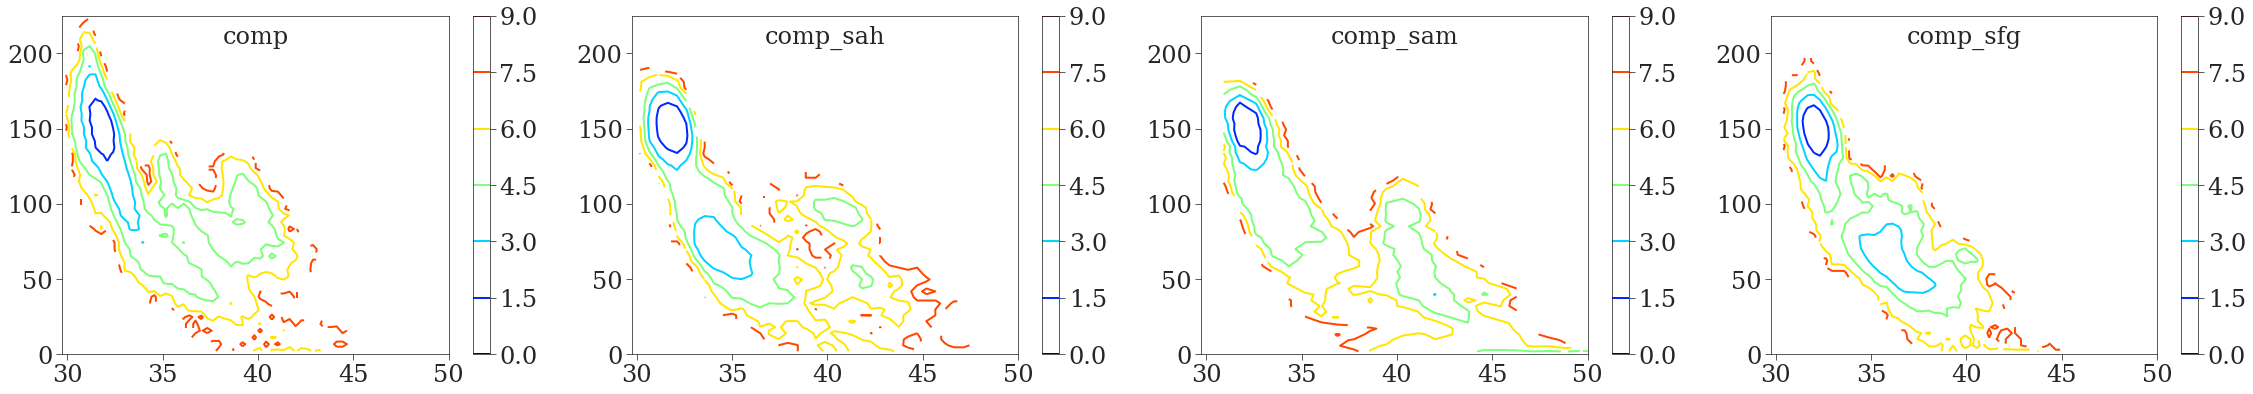

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(32,6))
axes = axes.flatten()

xlim = []
for lig, ax in zip(df_all.lig.unique(), axes): 
    sub_df = df_all[df_all.lig == lig]
    x, y, z = pyemma.plots.plots2d.get_histogram(
        sub_df['dist'], sub_df['n_contacts'],
        nbins=50, weights=None,
        avoid_zero_count=False)
    f = pyemma.plots.plots2d._to_free_energy(z, minener_zero=False) * 1.
    f -= np.min(f)
    [X, Y] = np.meshgrid(x, y)
    CS = ax.contour(X, Y, f, cmap='jet')
#     ax.clabel(CS, inline=True, fontsize=10)
    cbar_ = fig.colorbar(CS, ax=ax) 

    ax.set_title(lig, x=0.5, y=0.9)
    ax.set_xlim([29.75, 50])
    ax.set_ylim([0, 225])
#     if xlim == []: 
#         xlim = ax.get_xlim()
#         ylim = ax.get_ylim()
#     else:
#         ax.set_xlim(xlim)
#         ax.set_ylim(ylim)
        
# cbar_ = fig.colorbar(CS, ax=ax)   
# for ax in axes.flat:
# plt.xlabel(r'Distance ($\AA$)', x=-2)
# ax.set_ylabel('Number of contacts')
# ax.set_xlim([30, 60])
# axes[0].set_title('Stationary distribution', fontweight='bold')
# axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
fig.savefig('dist_contact_fe_sys.png', dpi=300, bbox_inches='tight')

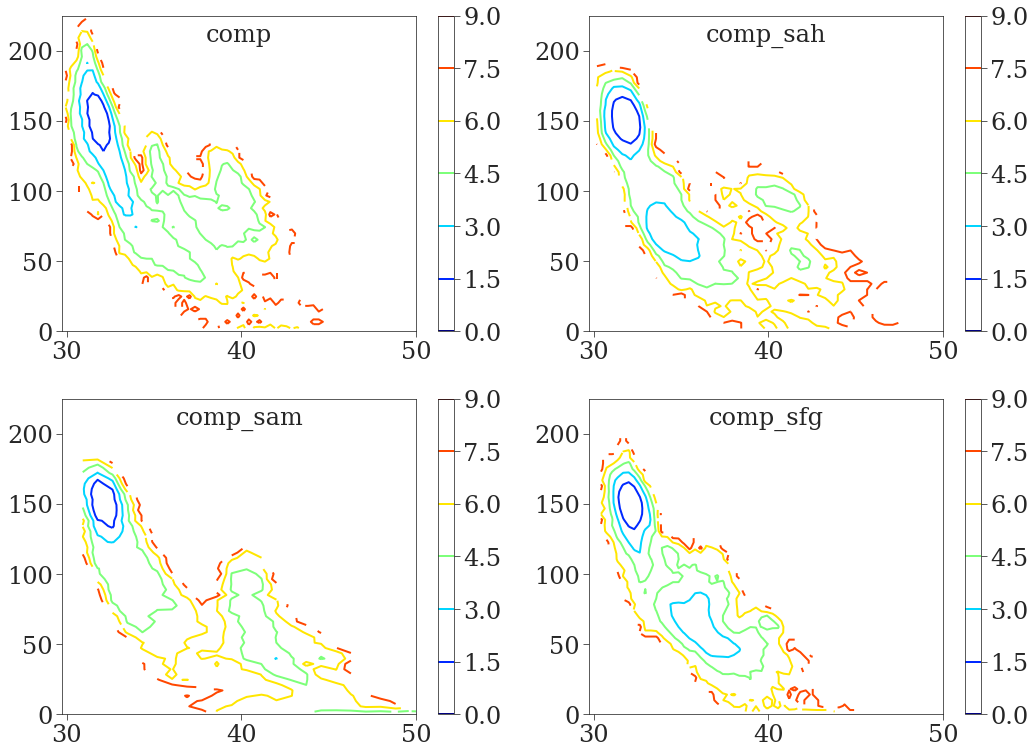

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(15, 11))
axes = axes.flatten()

xlim = []
for lig, ax in zip(df_all.lig.unique(), axes): 
    sub_df = df_all[df_all.lig == lig]
    x, y, z = pyemma.plots.plots2d.get_histogram(
        sub_df['dist'], sub_df['n_contacts'],
        nbins=50, weights=None,
        avoid_zero_count=False)
    f = pyemma.plots.plots2d._to_free_energy(z, minener_zero=False) * 1.
    f -= np.min(f)
    [X, Y] = np.meshgrid(x, y)
    CS = ax.contour(X, Y, f, cmap='jet')
#     ax.clabel(CS, inline=True, fontsize=10)
    cbar_ = fig.colorbar(CS, ax=ax) 

    ax.set_title(lig, x=0.5, y=0.9)
    ax.set_xlim([29.75, 50])
    ax.set_ylim([0, 225])
#     if xlim == []: 
#         xlim = ax.get_xlim()
#         ylim = ax.get_ylim()
#     else:
#         ax.set_xlim(xlim)
#         ax.set_ylim(ylim)
        
    
# for ax in axes.flat:
# plt.xlabel(r'Distance ($\AA$)', x=-2)
# ax.set_ylabel('Number of contacts')
# ax.set_xlim([30, 60])
# axes[0].set_title('Stationary distribution', fontweight='bold')
# axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
fig.savefig('dist_contact_fe_sys.png', bbox_inches='tight')

In [36]:
np.min(f)

0.0

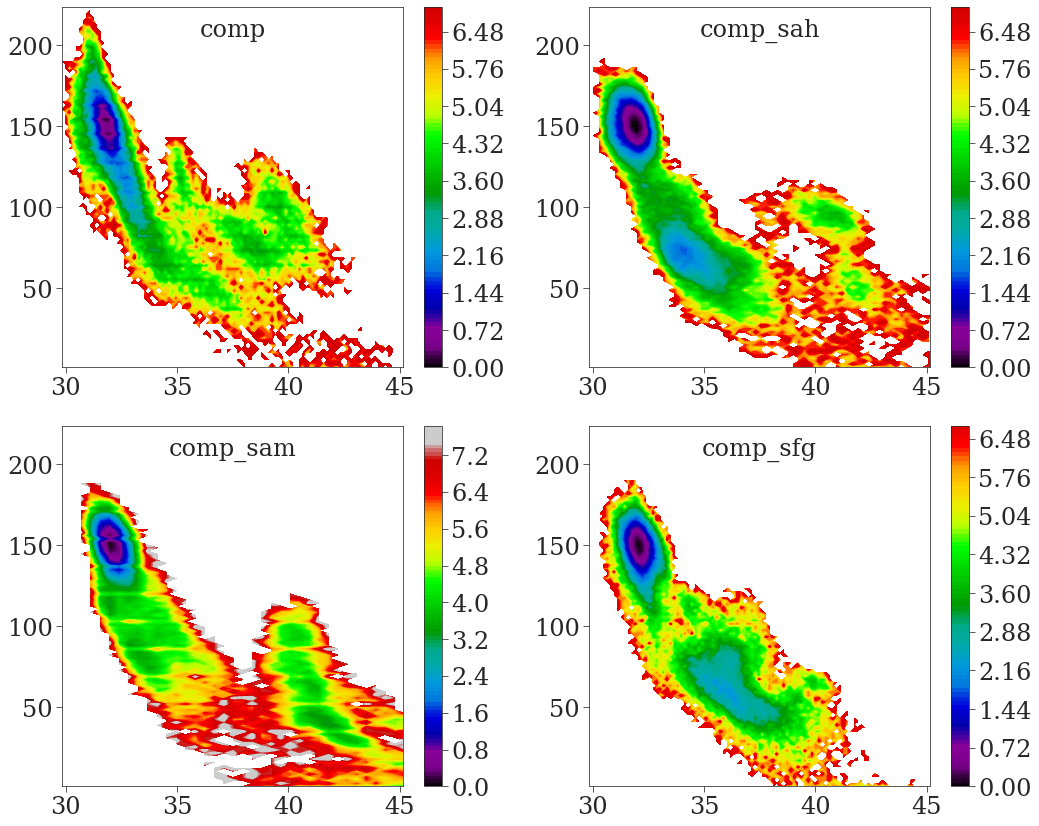

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

xlim = []
for lig, ax in zip(df_all.lig.unique(), axes): 
    sub_df = df_all[df_all.lig == lig]
    pyemma.plots.plot_free_energy(
        sub_df['dist'], sub_df['n_contacts'],
    #     weights=np.concatenate(msm.trajectory_weights()),
        ax=ax, cbar_label=None,
        vmax=7.5
#         legacy=False
    )
    ax.set_title(lig, x=0.5, y=0.9)
    if xlim == []: 
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
    else:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        
    
# for ax in axes.flat:
# plt.xlabel(r'Distance ($\AA$)', x=-2)
# ax.set_ylabel('Number of contacts')
# ax.set_xlim([30, 60])
# axes[0].set_title('Stationary distribution', fontweight='bold')
# axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
fig.savefig('dist_contact_fe_sys.png', bbox_inches='tight')

In [9]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

Text(0.5, 1.0, 'Simplest default with labels')

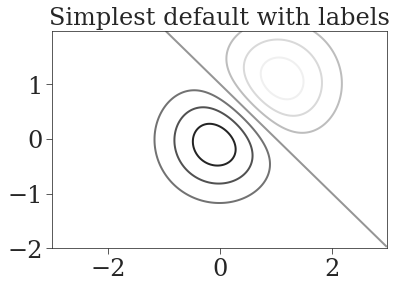

In [11]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
# ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

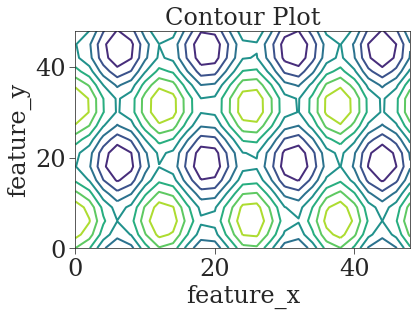

In [9]:
import matplotlib.pyplot as plt
import numpy as np
  
feature_x = np.arange(0, 50, 2)
feature_y = np.arange(0, 50, 3)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
  
fig, ax = plt.subplots(1, 1)
  
Z = np.cos(X / 2) + np.sin(Y / 4)
  
# plots contour lines
t = ax.contour(X, Y, Z, cmap='viridis')
  
ax.set_title('Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
  
plt.show()

In [31]:
?pyemma.plots.plot_free_energy

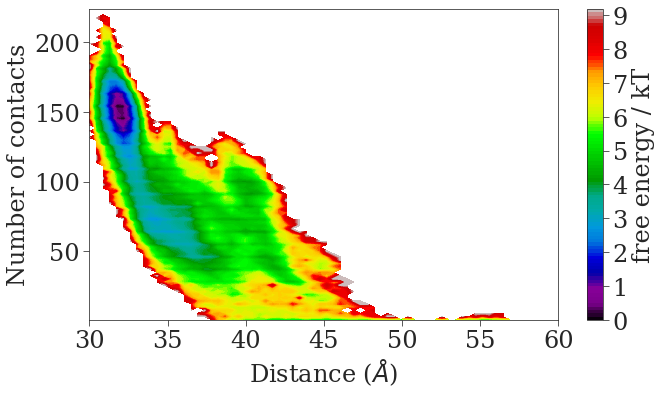

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
# pyemma.plots.plot_contour(
#     *tica_concatenated[:, :2].T,
#     msm.pi[dtrajs_concatenated],
#     ax=axes[0],
#     mask=True,
#     cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    df_all['dist'], df_all['n_contacts'],
#     weights=np.concatenate(msm.trajectory_weights()),
    ax=ax,

    legacy=False)
# for ax in axes.flat:
ax.set_xlabel(r'Distance ($\AA$)')
ax.set_ylabel('Number of contacts')
ax.set_xlim([30, 60])
# axes[0].set_title('Stationary distribution', fontweight='bold')
# axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
fig.savefig('dist_contact_fe.png', bbox_inches='tight')

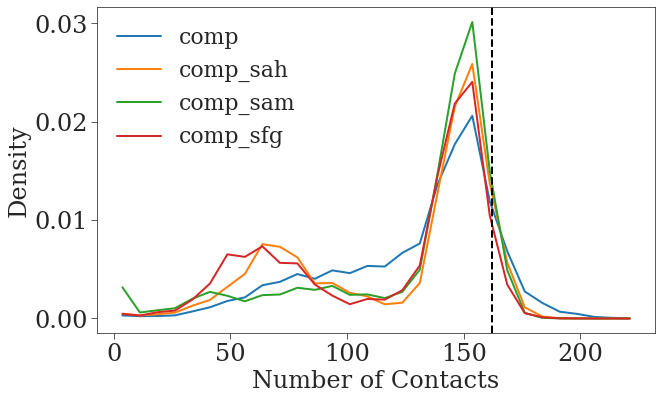

In [40]:
fig, ax = plt.subplots(figsize=(10,6))

dist = df_all['n_contacts'].to_list()
bins=np.histogram(dist, bins=30)[1]
x = (bins[:-1] + bins[1:]) / 2

sys_names = set([i[:-4] for i in sorted(df_all.sys_name.unique())])
dist_col = {}
for sys_name in sys_names: 
    dist_col[sys_name] = []
    
for sys_name in sorted(df_all.sys_name.unique()): 
#     if sys_name.endswith('000'):
    sub_df_all = df_all[df_all['sys_name'] == sys_name]
    dist_col[sys_name[:-4]] += sub_df_all['n_contacts'].to_list()
    
for sys_name in sorted(sys_names): 
    n, _ = np.histogram(dist_col[sys_name], bins=bins, density=True)
    ax.plot(x, n, label=sys_name) 
#     if col.startswith('rmsd'): 
#         _ = ax.hist(df_all[col].to_list(), bins=bins, label=col, alpha=.6, edgecolor='white') 

ax.axvline(x=162, color='k', linestyle='--')

ax.set_ylabel("Density")
ax.set_xlabel(r"Number of Contacts")
ax.legend()
fig.savefig('hist_contact.png', bbox_inches='tight')
# ax.set_xlim([29, 45])
#     ax.set_title('')

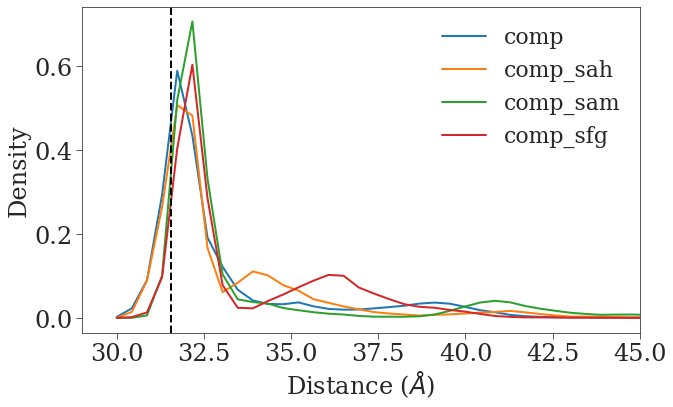

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

df=df_all
dist = df['dist'].to_list()
bins=np.histogram(dist, bins=100)[1]
x = (bins[:-1] + bins[1:]) / 2

sys_names = set([i[:-4] for i in sorted(df.sys_name.unique())])
dist_col = {}
for sys_name in sys_names: 
    dist_col[sys_name] = []
    
for sys_name in sorted(df.sys_name.unique()): 
#     if sys_name.endswith('000'):
    sub_df = df[df['sys_name'] == sys_name]
    dist_col[sys_name[:-4]] += sub_df['dist'].to_list()
    
for sys_name in sorted(sys_names): 
    n, _ = np.histogram(dist_col[sys_name], bins=bins, density=True)
    ax.plot(x, n, label=sys_name) 
#     if col.startswith('rmsd'): 
#         _ = ax.hist(df[col].to_list(), bins=bins, label=col, alpha=.6, edgecolor='white') 

ax.axvline(x=31.57, color='k', linestyle='--')

ax.set_ylabel("Density")
ax.set_xlabel(r"Distance ($\AA$)")
ax.legend()
ax.set_xlim([29, 45])
#     ax.set_title('')
fig.savefig('hist_dist.png', bbox_inches='tight')
# ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))